In [1]:
# https://towardsdatascience.com/find-and-plot-your-optimal-path-using-plotly-and-networkx-in-python-17e75387b873
import osmnx as ox
import networkx as nx
import plotly.graph_objects as go
import numpy as np
import pickle
import os

In [2]:
def plot_path(lat, long, origin_point, destination_point):
    
    """
    Given a list of latitudes and longitudes, origin 
    and destination point, plots a path on a map
    
    Parameters
    ----------
    lat, long: list of latitudes and longitudes
    origin_point, destination_point: co-ordinates of origin
    and destination
    Returns
    -------
    Nothing. Only shows the map.
    """
    # adding the lines joining the nodes
    fig = go.Figure(go.Scattermapbox(
        name = "Path",
        mode = "lines",
        lon = long,
        lat = lat,
        marker = {'size': 10},
        line = dict(width = 4.5, color = 'blue')))
    # adding source marker
    fig.add_trace(go.Scattermapbox(
        name = "Source",
        mode = "markers",
        lon = [origin_point[1]],
        lat = [origin_point[0]],
        marker = {'size': 12, 'color':"red"}))
     
    # adding destination marker
    fig.add_trace(go.Scattermapbox(
        name = "Destination",
        mode = "markers",
        lon = [destination_point[1]],
        lat = [destination_point[0]],
        marker = {'size': 12, 'color':'green'}))
    
    # getting center for plots:
    lat_center = np.mean(lat)
    long_center = np.mean(long)
    # defining the layout using mapbox_style
    fig.update_layout(mapbox_style="stamen-terrain",
        mapbox_center_lat = 30, mapbox_center_lon=-80)
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                      mapbox = {
                          'center': {'lat': lat_center, 
                          'lon': long_center},
                          'zoom': 13})
    fig.show()

In [3]:
def getNetworkAround(lat,lon,distm):
    fn = '../data/_osmnx/'+str(lat)+"_"+str(lon)+"_"+str(distm)+'.pickle'
    if not os.path.isfile(fn):
        G = ox.graph_from_point((lat, lon), dist=distm, network_type='walk')
        with open(fn, 'wb') as f:
            pickle.dump(G, f)
    else:
        with open(fn,"rb") as f:
            G = pickle.load(f)
    return G

In [6]:
# Defining the map boundaries 
def showSGP():
    north, east, south, west = 1.327587854836542, 103.88297275579747, 1.2669696458157633, 103.79947552605792
    # Downloading the map as a graph object 
    G = ox.graph_from_bbox(north, south, east, west, network_type = 'walk',clean_periphery=False)  
    # Plotting the map graph 
    ox.plot_graph(G)
    #G = getNetworkAround(1.295, 103.836, 4000)
    #ox.plot_graph(G)

# Plotting the shortest path

In [15]:
def mapPath(G,origin_point,destination_point,WGT = 'length'):
    # define origin and desination locations 
    #origin_point = (1.278353050783832, 103.84105995326672) 
    #destination_point = (1.2853283229119088, 103.85262989657622)
    # get the nearest nodes to the locations 
    origin_node = ox.distance.nearest_nodes(G, origin_point[1],origin_point[0]) 
    destination_node = ox.distance.nearest_nodes(G, destination_point[1],destination_point[0])
    # printing the closest node id to origin and destination points origin_node, destination_node
    
        # Finding the optimal path 
    route = nx.shortest_path(G, origin_node, destination_node, weight = WGT) 
    # getting coordinates of the nodes
    # we will store the longitudes and latitudes in following list 
    long = [] 
    lat = []  
    for i in route:
        point = G.nodes[i]
        long.append(point['x'])
        lat.append(point['y'])
    plot_path(lat, long, origin_point, destination_point)
    route_map = ox.plot_route_folium(G, route)
    route_map.save('../data/_osmnx/test.html')
    return lat,long,route

# Custom edges values 

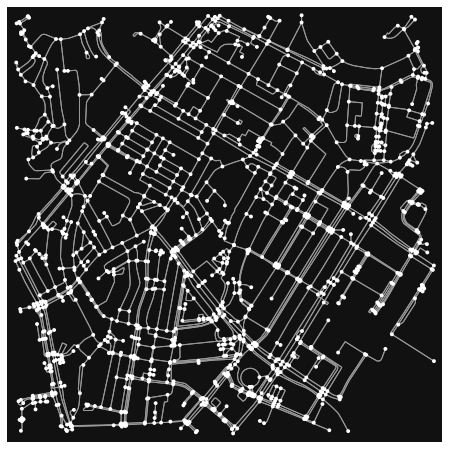

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [19]:
G = getNetworkAround(1.2806, 103.8464, 750)
ox.plot_graph(G)

In [9]:
def find_speed(row):
    if row['highway'] =="fast":
        return 100/3.6
    elif row['highway']  =="slow":
        return 50/3.6
    elif row['highway']  =="other":
        return 70/3.6
    else:
        return 5/3.6

In [10]:
for u,v,d in G.edges(data=True):
    d['weight'] = 0.5 +  1.0 / d['length']

In [16]:
origin_point = (1.2822526633223938, 103.84732075349544) 
destination_point = (1.2785088771898996, 103.8413733342337)

lat,long,route = mapPath(G,origin_point,destination_point,WGT = 'weight');

In [17]:
lat

[1.2822604,
 1.2824542,
 1.282692,
 1.2824666,
 1.2827254,
 1.281554,
 1.2817124,
 1.281414,
 1.2814714,
 1.2811276,
 1.2812228,
 1.2810262,
 1.2811542,
 1.2807558,
 1.2802398,
 1.2800031,
 1.2798578,
 1.2797305,
 1.2796239,
 1.2791441,
 1.2788343,
 1.2788538,
 1.2785871,
 1.2785585]

In [14]:
origin_point = (1.2822526633223938, 103.84732075349544) 
destination_point = (1.2785088771898996, 103.8413733342337)

mapPath(G,origin_point,destination_point,WGT = 'length')